https://www.youtube.com/watch?v=AuzoQ8eZXEw

# 시계열 데이터 분석이란?
시간에 따라서 값들이 측정되는 데이터를 시계열 데이터라고 한다.  
그럼 다음 며칠은 무슨 값을 가질까? 하는 것이 시계열 데이터 분석이라고 한다.  


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 데이터 수집

In [12]:
# source : https://www.blockchain.com/ko/charts/market-price?timespan=80days

file_path = './market-price.csv'
bitcoin_df = pd.read_csv(file_path)
bitcoin_df.columns = ['day', 'price']
bitcoin_df

,day,price
0,2021-05-08 00:00:00,57380.27
1,2021-05-09 00:00:00,58928.81
2,2021-05-10 00:00:00,58280.73
3,2021-05-11 00:00:00,55883.50
4,2021-05-12 00:00:00,56750.00
...,...,...
361,2022-05-04 00:00:00,37727.19
362,2022-05-05 00:00:00,39674.89
363,2022-05-06 00:00:00,36549.90
364,2022-05-07 00:00:00,36013.03


결측치 확인

In [13]:
print(bitcoin_df.shape)
print(bitcoin_df.info())

(366, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     366 non-null    object 
 1   price   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


시계열 데이터 살펴보기

In [14]:
# to_datetime으로 day 피처를 시계열 피처로 변환한다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

# day를 데이터프레임의 인덱스로 설정한다.
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)
bitcoin_df

,price
day,
2021-05-08,57380.27
2021-05-09,58928.81
2021-05-10,58280.73
2021-05-11,55883.50
2021-05-12,56750.00
...,...
2022-05-04,37727.19
2022-05-05,39674.89
2022-05-06,36549.90


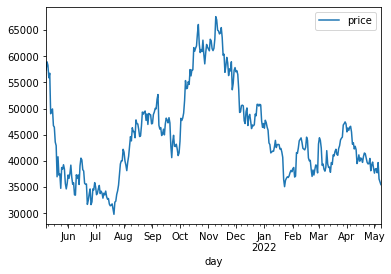

In [15]:
# 일자별 비트코인 시세를 시각화
bitcoin_df.plot()
plt.show()

# ARIMA 모델 활용

AR : Auto Regression =  
데이터의 과거를 정보로 사용하는 개념  
현재의 상태는 **이전의 상태**를 참고해서 계산된다  

MA : Moving Average =  
이전 행에서의 오차  
예측된 값과 실제 값이 있을텐데, **이전 항에서의 차이**를 참고하겠다

I : 차분 =  
시계열 데이터의 불규칙성을 보정해준다

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

TypeError: fit() got an unexpected keyword argument 'trend'

# Facebook Prophet 활용하기

In [17]:
from prophet import Prophet
bitcoin_df = pd.read_csv(file_path)
bitcoin_df.columns = ['ds', 'y']
print(bitcoin_df.head())
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

                    ds         y
0  2021-05-08 00:00:00  57380.27
1  2021-05-09 00:00:00  58928.81
2  2021-05-10 00:00:00  58280.73
3  2021-05-11 00:00:00  55883.50
4  2021-05-12 00:00:00  56750.00
Initial log joint probability = -6.84203
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          1110     0.0334974       374.385           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1123.17    0.00943216       133.938      0.7908      0.7908      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1126.33    0.00696348       107.809           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1143.17    0.00151362       1257.38      0.2296      0.2296      461   
    Iter      log prob        ||dx||      ||g

2596       40.5719           1           1     5564   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       1182.47   0.000621095       201.292           1           1     5687   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       1182.59    0.00141854       239.814      0.5821      0.5821     5813   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       1182.83    8.5781e-05       157.337      0.3911      0.3911     5954   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       1183.13    0.00563155       65.7119           1           1     6079   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       1183.57      0.011683        438.58           1           1     6216   
    Iter      log prob        ||dx||      ||grad||

In [18]:
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

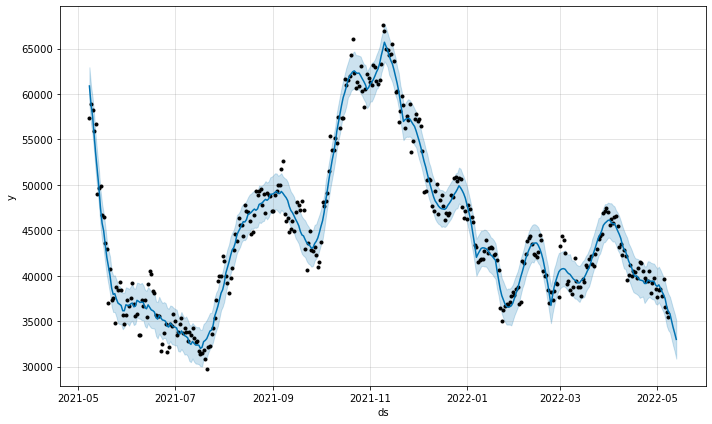

In [19]:
fig1 = prophet.plot(forecast_data)

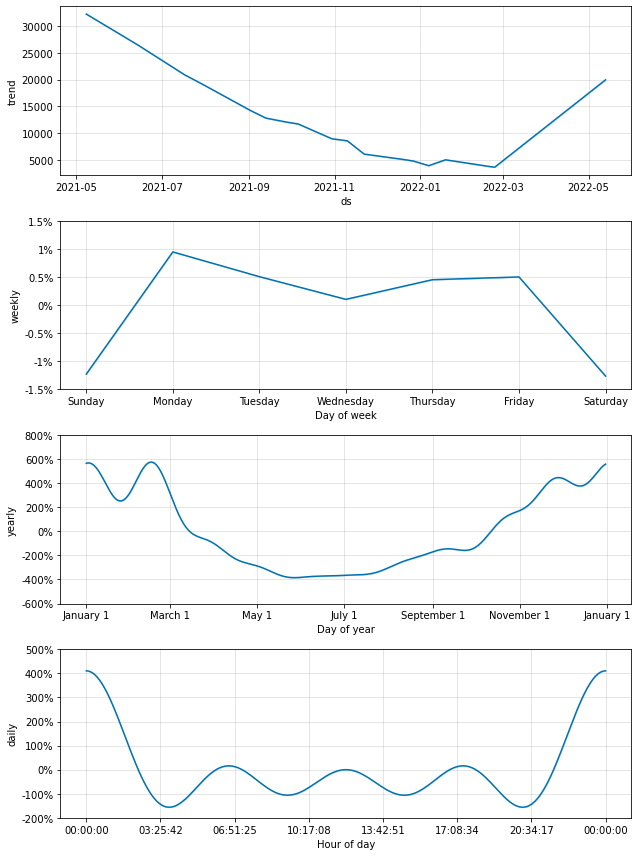

In [20]:
fig2 =  prophet.plot_components(forecast_data)